## **Importing libraries & Reading Data:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("youtube_dislike_dataset.csv")

## **Sanity Check and Data Cleaning:**

In [3]:
df.head()

video_id                                       title  \
0  --0bCF-iK2E        Jadon Sancho  Magical Skills & Goals   
1  --14w5SOEUs          Migos - Avalanche (Official Video)   
2  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys   
3  --4tfbSyYDE     JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO   
4  --DKkzWVh-E                Why Retaining Walls Collapse   

                 channel_id          channel_title         published_at  \
0  UC6UL29enLNe4mqwTfAyeNuw             Bundesliga  2021-07-01 10:00:00   
1  UCGIelM2Dj3zza3xyV3pL3WQ              MigosVEVO  2021-06-10 16:00:00   
2  UClBKH8yZRcM4AsRjDVEdjMg     Television Academy  2021-09-20 01:03:32   
3  UCsmXiDP8S40uBeJYxvyulmA                    JO1  2021-03-03 10:00:17   
4  UCMOqf8ab-42UUQIdVoKwjlQ  Practical Engineering  2021-12-07 13:00:00   

   view_count   likes  dislikes  comment_count  \
0     1048888   19515       226           1319   
1    15352638  359277      7479          18729   
2      925281   11212       401            831   
3     2641597   39131       441           3745   
4      715724   32887       367           1067   

                                                tags  \
0  football soccer ftbol alemn Bundesliga season ...   
1  Migos Avalanche Quality Control Music/Motown R...   
2                                                      
3  PRODUCE101JAPAN              JO1   TheSTAR STA...   
4  retaining wall New Jersey highway Direct Conne...   

                                         description  \
0  Enjoy the best skills and goals from Jadon San...   
1  Watch the the official video for Migos - "Aval...   
2  Hannah Waddingham wins the Emmy for Supporting...   
3  JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...   
4  One of the most important (and innocuous) part...   

                                            comments  
0  Respect to Dortmund fans,must be sad losing hi...  
1  Migos just makes me want to live my live to th...  
2  Hannah's energy bursts through any screen. Wel...  
3  youngVer><  REN is really PERFECT. It's not ju...  
4   Keep up with all my projects here: https://pr...

In [4]:
df.shape

(37422, 12)

In [5]:
df.isnull().sum()

video_id           0
title              0
channel_id         0
channel_title      0
published_at       0
view_count         0
likes              0
dislikes           0
comment_count      0
tags               0
description        0
comments         158
dtype: int64

In [6]:
# missing value treatment

# choose the method of imputting missing values using methods like mean, median, mode, or KNNImputer - works only for numerical columns
# for categorical columns, we fill the values with mode
# for continuous data, we fill with median
# for discrete data, we will with mode
# for categorical column, we fill it with mode
# for target variable (output to get after training model), we don't perform missing value treatment.
# for i in []:
#    df[i].fillna(df[i].median(), inplace=True)
# timeframe in vid 30:00

In [7]:
# knn imputer takes average of the nearest value and fill the missing value with the average of the missing value:
# related to the above
# knn imputer is algorithm for filling the missing value
# look more into it


# from sklearn.impute import KNNImputer
# impute = KNNImputer()

# for i in df.select_dtypes(include="number").columns:
#     df[i] = impute.fit_transform(df[ [i] ])
    

In [8]:
df.duplicated().sum()

0

In [9]:
# use this function to drop the duplicate values
# df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


In [11]:
# If any column has more than 50% missing values, we should delete that column from our dataset
df.isnull().sum()/df.shape[0]*100

video_id         0.000000
title            0.000000
channel_id       0.000000
channel_title    0.000000
published_at     0.000000
view_count       0.000000
likes            0.000000
dislikes         0.000000
comment_count    0.000000
tags             0.000000
description      0.000000
comments         0.422212
dtype: float64

In [12]:
df.select_dtypes(include="object").columns

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'tags', 'description', 'comments'],
      dtype='object')

In [13]:
# checking for garbage value - garbage value will always be present in the columns where whose datatype is ""objecty
for i in df.select_dtypes(include="object").columns:
    print(f"THE NAME OF THE COLUMN IS: {i}")
    print(df[i].unique()) # we can also use df[i].value_counts()
    print("---------------------------------------------------------")

THE NAME OF THE COLUMN IS: video_id
['--0bCF-iK2E' '--14w5SOEUs' '--40TEbZ9Is' ... 'zzk09ESX7e0' 'zzmQEb0Em5I'
 'zzxPZwaA-8w']
---------------------------------------------------------
THE NAME OF THE COLUMN IS: title
['Jadon Sancho  Magical Skills & Goals'
 'Migos - Avalanche (Official Video)'
 'Supporting Actress in a Comedy: 73rd Emmys' ...
 '[MV]  (MAMAMOO) - Where Are We Now'
 'FELLIPE ESCUDERO- Master Podcast  #12'
 'Gareth Bale brace secures dramatic comeback on final day of 20/21 season! | Leicester 2-4 Spurs']
---------------------------------------------------------
THE NAME OF THE COLUMN IS: channel_id
['UC6UL29enLNe4mqwTfAyeNuw' 'UCGIelM2Dj3zza3xyV3pL3WQ'
 'UClBKH8yZRcM4AsRjDVEdjMg' ... 'UC95x-m2toVa_BRmmQ6SrIYg'
 'UCb5jIJ27Ds32YE6xX3eIO3g' 'UC8NjnNWMsRqq11NYvHAQb1g']
---------------------------------------------------------
THE NAME OF THE COLUMN IS: channel_title
['Bundesliga' 'MigosVEVO' 'Television Academy' ... 'Magnolia Network'
 'Collaboration Nation' 'Master Podcast'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


In [15]:
# droppig the rows where there are null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37264 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37264 non-null  object
 1   title          37264 non-null  object
 2   channel_id     37264 non-null  object
 3   channel_title  37264 non-null  object
 4   published_at   37264 non-null  object
 5   view_count     37264 non-null  int64 
 6   likes          37264 non-null  int64 
 7   dislikes       37264 non-null  int64 
 8   comment_count  37264 non-null  int64 
 9   tags           37264 non-null  object
 10  description    37264 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.7+ MB


## **Statistical Summary**

In [16]:
# statistical summary for numerical columns
df.describe().T

count          mean           std      min        25%  \
view_count     37264.0  5.710821e+06  2.431304e+07  20368.0  514130.50   
likes          37264.0  1.672867e+05  5.384931e+05     22.0   13317.25   
dislikes       37264.0  4.996434e+03  3.075194e+04      3.0     282.75   
comment_count  37264.0  9.966953e+03  1.173465e+05      1.0     914.00   

                     50%         75%           max  
view_count     1321860.5  3674527.25  1.322797e+09  
likes            42556.0   130966.50  3.183768e+07  
dislikes           798.0     2466.25  2.397733e+06  
comment_count     2347.0     6212.00  1.607103e+07

In [17]:
# statistical summary for non-numerical(objects) columns
df.describe(include="object").T

count unique  \
video_id       37264  37264   
title          37264  36958   
channel_id     37264  10891   
channel_title  37264  10813   
published_at   37264  36617   
tags           37264  28705   
description    37264  35479   
comments       37264  37264   

                                                             top  freq  
video_id                                             --0bCF-iK2E     1  
title                                                        www    21  
channel_id                              UCNAf1k0yIjyGu3k9BwAg3lg   533  
channel_title                                Sky Sports Football   533  
published_at                                 2020-10-16 04:00:10     6  
tags                                                              3808  
description                                                        587  
comments       Respect to Dortmund fans,must be sad losing hi...     1

## **Univariate Analysis:**

In [18]:
df.select_dtypes(include="object").columns

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'tags', 'description', 'comments'],
      dtype='object')

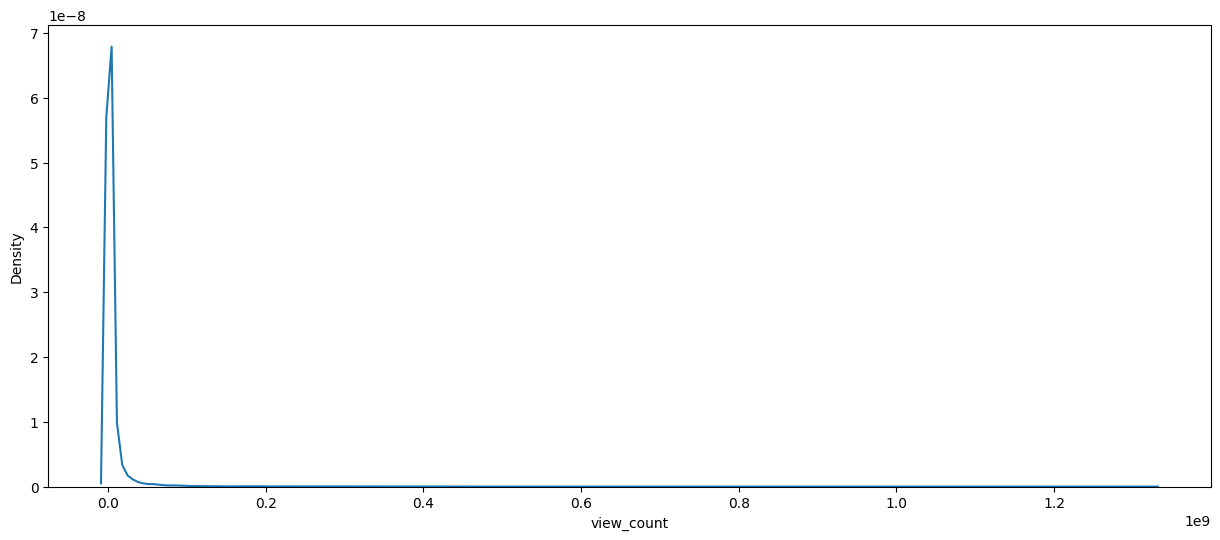

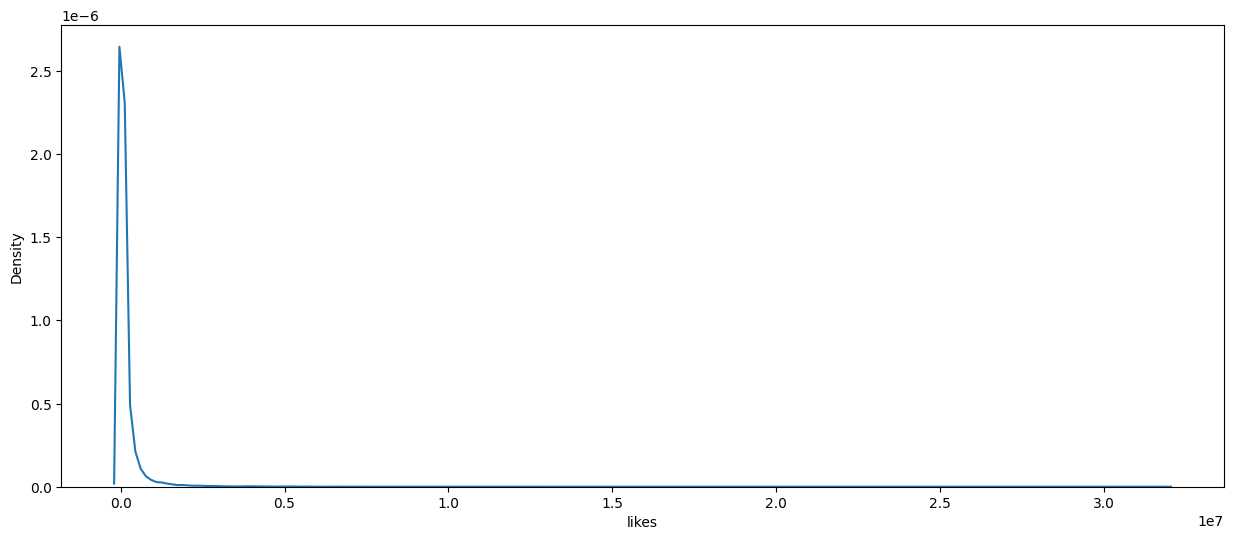

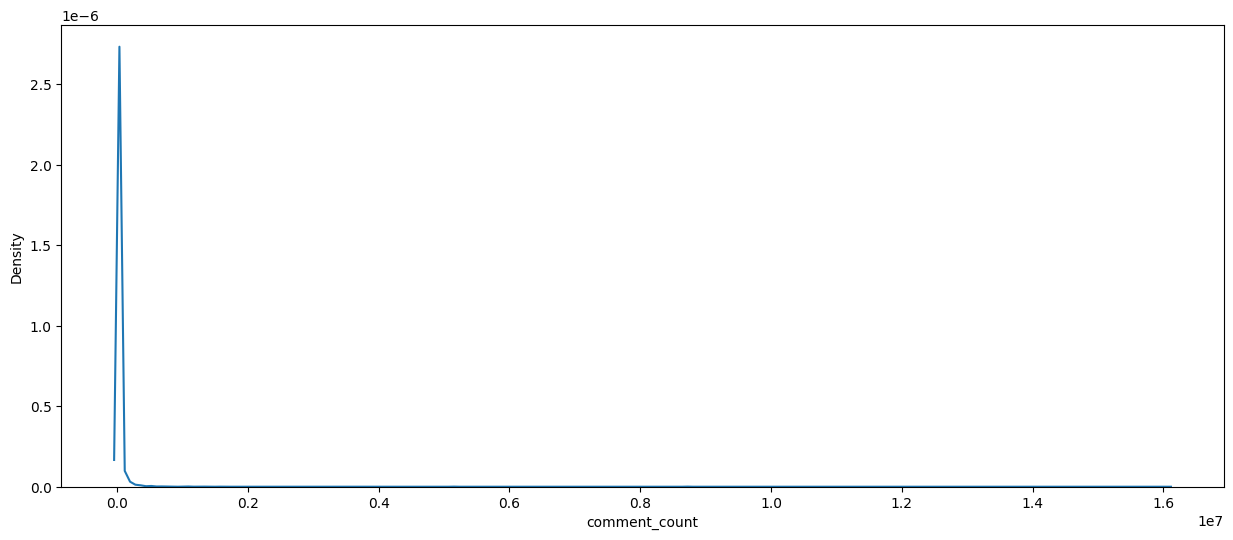

In [19]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15, 6))
    sns.kdeplot(data=df, x=i)
    plt.show

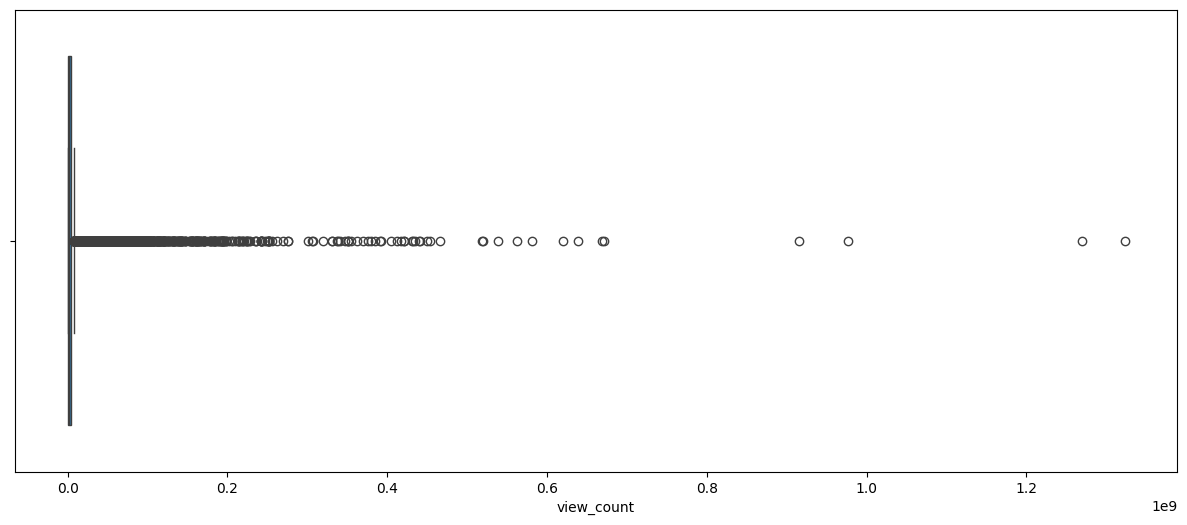

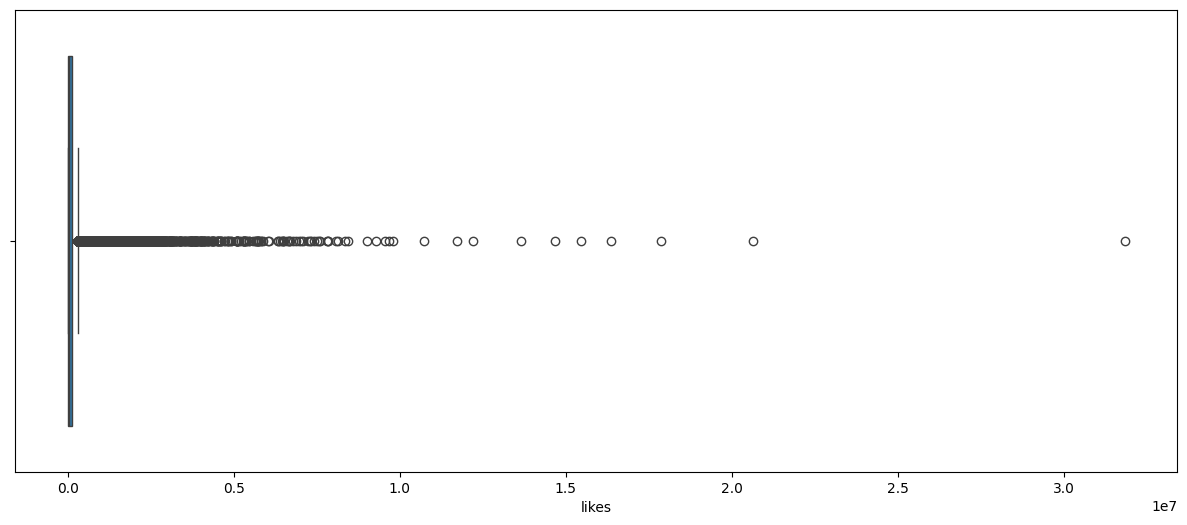

In [20]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x=i)
    plt.show

## **Bivariate/Multivariate Analysis:**

In [21]:
df.select_dtypes(include="number").columns

Index(['view_count', 'likes', 'dislikes', 'comment_count'], dtype='object')

In [22]:
# identify the dependent feature in the dataset and then use scatterplot in order to understand the relationship
# we have to check the relationship before and after outlier treatment

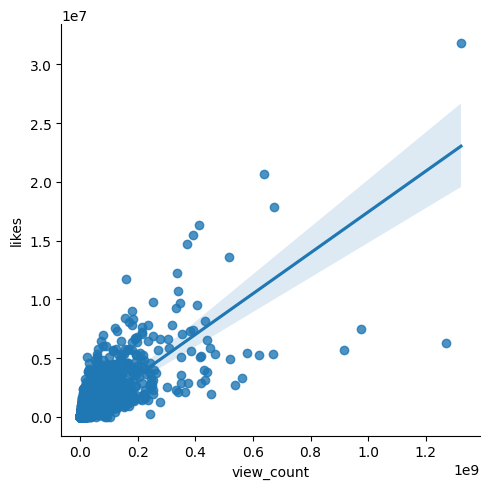

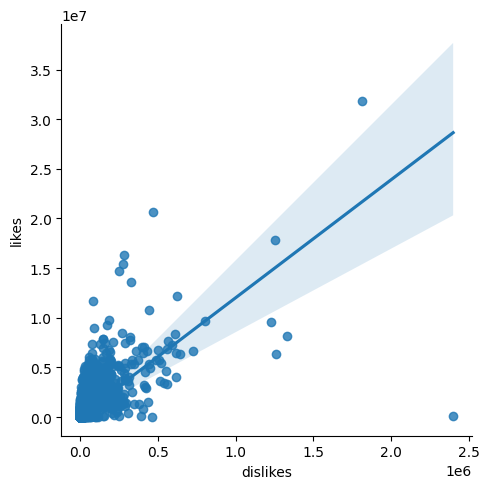

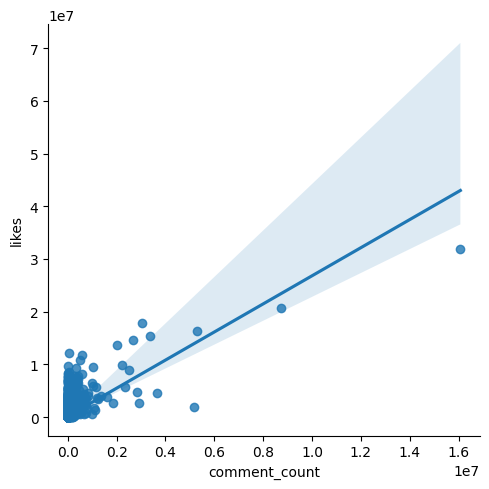

In [23]:
# make scatter plot in order to find the relationship between variables w.r.t likes. 
# either use "sns.scatterplot() or sns.lmplot()"
# lm plot is same as scatter plot but the difference is that there is a line in lm plot which shows whether the relationship is positive or negative
for i in ['view_count', 'dislikes', 'comment_count']:
    sns.lmplot(data=df, x=i, y="likes")
    plt.show

In [24]:
df.select_dtypes(include="number").corr()

view_count     likes  dislikes  comment_count
view_count       1.000000  0.784199  0.684576       0.464442
likes            0.784199  1.000000  0.679668       0.581117
dislikes         0.684576  0.679668  1.000000       0.391999
comment_count    0.464442  0.581117  0.391999       1.000000

<Axes: >

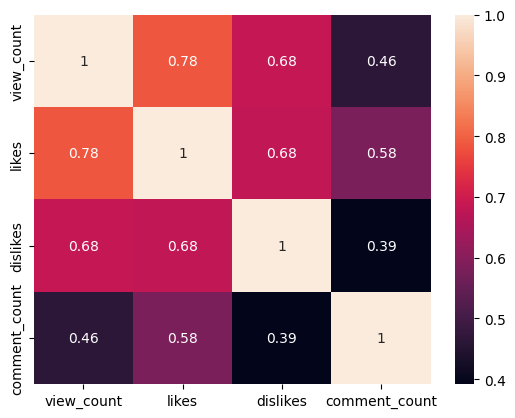

In [25]:
# "annot=True" in heatmap is to show the values (percentages of the relationship)
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

In [1]:
# use pairplot for multi-variate analysis

## **Outlier Detection and handling:**

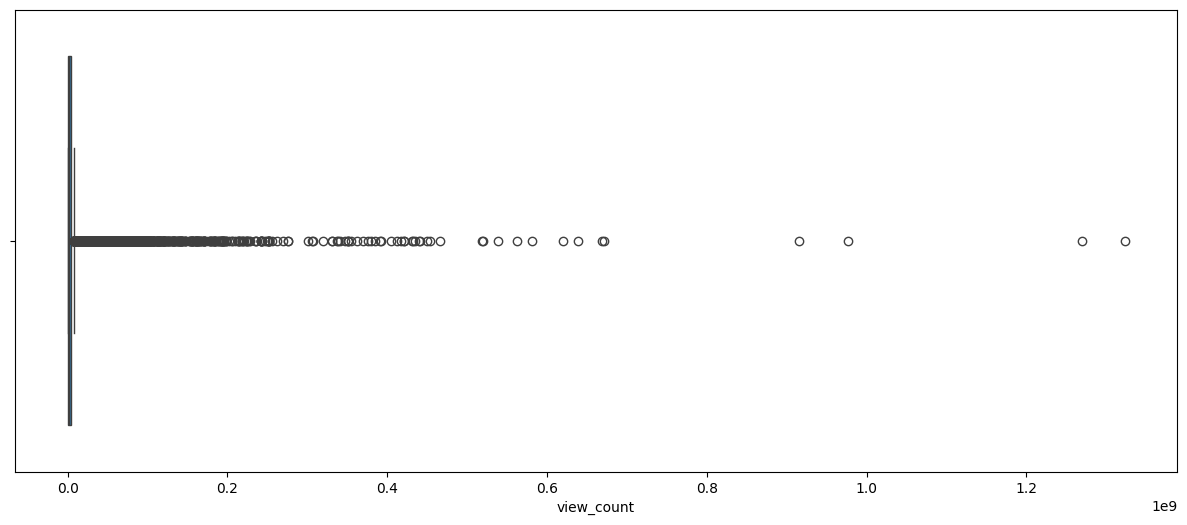

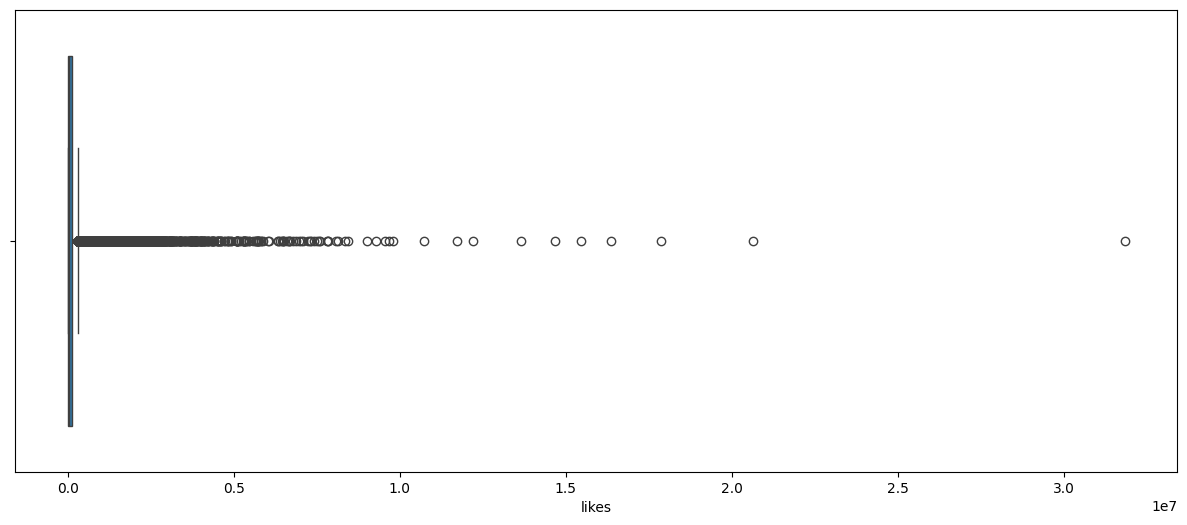

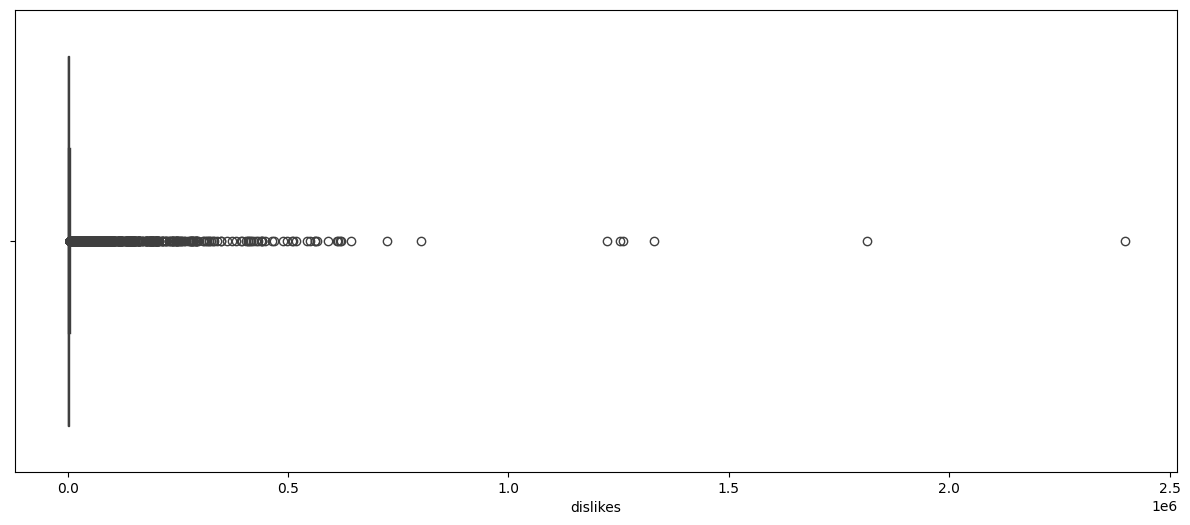

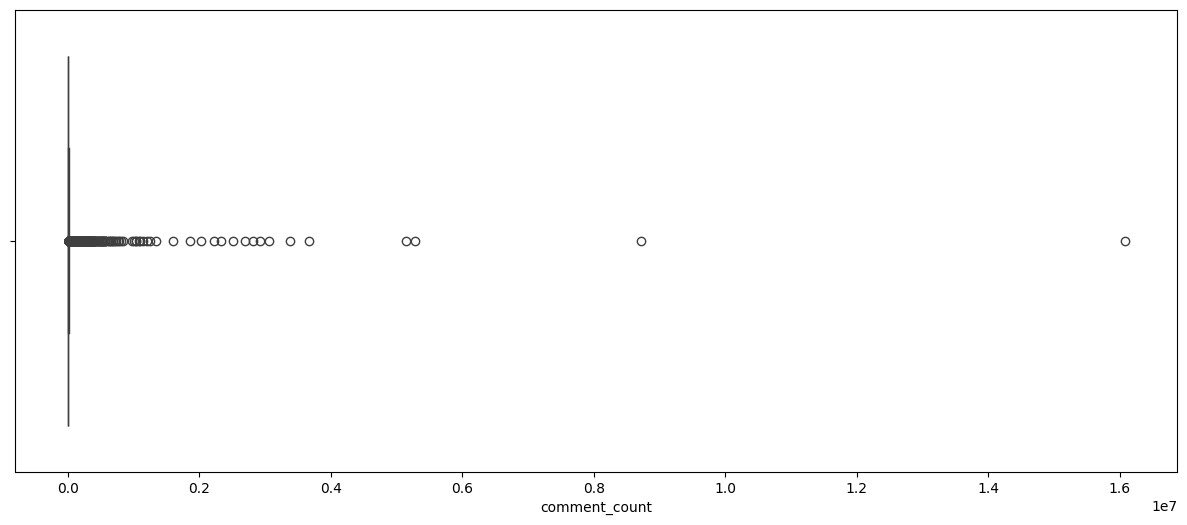

In [26]:
# we can use boxplot for outlier detection
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x=i)
    plt.show

In [27]:
df.head(2)

video_id                                 title  \
0  --0bCF-iK2E  Jadon Sancho  Magical Skills & Goals   
1  --14w5SOEUs    Migos - Avalanche (Official Video)   

                 channel_id channel_title         published_at  view_count  \
0  UC6UL29enLNe4mqwTfAyeNuw    Bundesliga  2021-07-01 10:00:00     1048888   
1  UCGIelM2Dj3zza3xyV3pL3WQ     MigosVEVO  2021-06-10 16:00:00    15352638   

    likes  dislikes  comment_count  \
0   19515       226           1319   
1  359277      7479          18729   

                                                tags  \
0  football soccer ftbol alemn Bundesliga season ...   
1  Migos Avalanche Quality Control Music/Motown R...   

                                         description  \
0  Enjoy the best skills and goals from Jadon San...   
1  Watch the the official video for Migos - "Aval...   

                                            comments  
0  Respect to Dortmund fans,must be sad losing hi...  
1  Migos just makes me want to live my live to th...

In [28]:
# decide whether to do outlier treatment, and if so then how?
# outlier treatment is done only for continuos numerical data, we don't perform outlier treatment for target variable
# we also don't do outlier treatment for categorical and discrete variables

In [29]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw, uw

In [30]:
wisker(df["view_count"])

(-4226464.625, 8415122.375)

In [31]:
# in the list, put names of those columns where we want to fix outliers
for i in []:
    lw, uw = wisker(df[i])
    df[i]=np.where(df[i]<lw, lw, df[i])
    df[i]=np.where(df[i]>uw, uw, df[i])

In [32]:
# after performing the above step, again use loop to create boxplots of the outlier columns and visualize it in fixed format

## **Performing FE (Kind of)**

In [33]:
df.dtypes

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
tags             object
description      object
comments         object
dtype: object

In [34]:
df.head(2)

video_id                                 title  \
0  --0bCF-iK2E  Jadon Sancho  Magical Skills & Goals   
1  --14w5SOEUs    Migos - Avalanche (Official Video)   

                 channel_id channel_title         published_at  view_count  \
0  UC6UL29enLNe4mqwTfAyeNuw    Bundesliga  2021-07-01 10:00:00     1048888   
1  UCGIelM2Dj3zza3xyV3pL3WQ     MigosVEVO  2021-06-10 16:00:00    15352638   

    likes  dislikes  comment_count  \
0   19515       226           1319   
1  359277      7479          18729   

                                                tags  \
0  football soccer ftbol alemn Bundesliga season ...   
1  Migos Avalanche Quality Control Music/Motown R...   

                                         description  \
0  Enjoy the best skills and goals from Jadon San...   
1  Watch the the official video for Migos - "Aval...   

                                            comments  
0  Respect to Dortmund fans,must be sad losing hi...  
1  Migos just makes me want to live my live to th...

In [35]:
df["published_at"] = pd.to_datetime(df["published_at"])

In [36]:
df.dtypes

video_id                 object
title                    object
channel_id               object
channel_title            object
published_at     datetime64[ns]
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
tags                     object
description              object
comments                 object
dtype: object

## **Documentaton of insights obtained while performing EDA:**

In [37]:
# missing value is treated
# outliers are present in the data
# there is a best relationship between likes, comments, views

## **Additional Info:**

In [38]:
# syntax to stop the warnings when plotting graphs
import warnings
warnings.filterwarnings("ignore")

In [39]:
# encoding of data means fitting all the columns in numerical format in order to train the model
# We can do encoding of data in two ways
# 1) One-hot encoding: 
# 2) Label encoding:

In [2]:
# another command to filter out missing values

#data = data[~data['Price.DE.'].isna()]

In [4]:
# The .nunique() method in pandas is used to return the number of unique elements in a Series (column) of a DataFrame. In the context of the command:
# Use this to find duplicate values (for example in a EV dataset, use it for car name)

# print(data.Car_name.nunique())